In [1]:
# we mount our google drive space
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# we move into the directory that contains the data
# /content/drive/MyDrive/Colab Notebooks/00 - Lecture prototypes/2023_01 - churn banking lecture/2025_02 - RBS - master DS - evaluation - single topic lecture - data
%cd /content/drive/MyDrive/Colab Notebooks/00 - Lecture prototypes/2023_01 - churn banking lecture/2025_02 - RBS - master DS - evaluation - single topic lecture - data
# !pwd or %pwd to check

/content/drive/MyDrive/Colab Notebooks/00 - Lecture prototypes/2023_01 - churn banking lecture/2025_02 - RBS - master DS - evaluation - single topic lecture - data


In [3]:
def load_object(_object_file_name):
  import pickle
  # open a file, where you stored the pickled data
  file = open(_object_file_name, 'rb')
  # dump information to that file
  _loaded_object = pickle.load(file)
  # close the file
  file.close()
  return(_loaded_object)

dtc = load_object('dtc_eng.pickle')
dtc2 = load_object('dtc2_eng.pickle')
dtc3 = load_object('dtc3_eng.pickle')
train_X = load_object('train_X.pickle')
test_X = load_object('test_X.pickle')
train_y = load_object('train_y.pickle')
test_y = load_object('test_y.pickle')

In [4]:
# we regenerate scores and predictions
# 1 - for dtc
# we use the model to make predictions (and generate scores) on the test dataset
label_pred_test = dtc.predict(test_X)
score_test = dtc.predict_proba(test_X)
# (this is less useful) - predict on training dataset
label_pred_train = dtc.predict(train_X)
score_train = dtc.predict_proba(train_X)
# 2 - for dtc2
# we use the model to make predictions and get scores on the test dataset
label_pred_test_2 = dtc2.predict(test_X)
score_test_2 = dtc2.predict_proba(test_X)
# 3 - for dtc3
# we use the model to make predictions and get scores on the test dataset
label_pred_test_3 = dtc3.predict(test_X)
score_test_3 = dtc3.predict_proba(test_X)


In [5]:
# we evaluate out models' performance
# we install the mljar-scikit-plot (this package has an interesting story)
!pip install mljar-scikit-plot
import scikitplot as skplt

  Preparing metadata (setup.py) ... done
  Created wheel for mljar-scikit-plot: filename=mljar_scikit_plot-0.3.12-py3-none-any.whl size=32014 sha256=0d91ee9dc584da4c41417a8fe69507bc0d2a712ed09a1e8a2623947b56017374
  Stored in directory: /root/.cache/pip/wheels/e2/2d/3e/8afe0632e7b03c3ae7b8048f88f0dcca4355b32d31abaea3ba
Successfully built mljar-scikit-plot


<Axes: title={'center': 'cumulative gains for 3 models'}, xlabel='Percentage of sample', ylabel='Gain'>

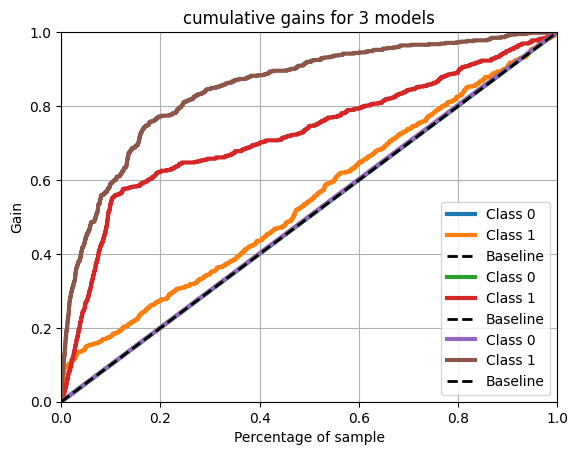

In [6]:
# we compare the gains curve of all models
ax = skplt.metrics.plot_cumulative_gain(test_y, score_test)
ax = skplt.metrics.plot_cumulative_gain(test_y, score_test_2, ax=ax)
skplt.metrics.plot_cumulative_gain(test_y, score_test_3, ax=ax,  title = "cumulative gains for 3 models")

<Axes: title={'center': 'ROC Curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

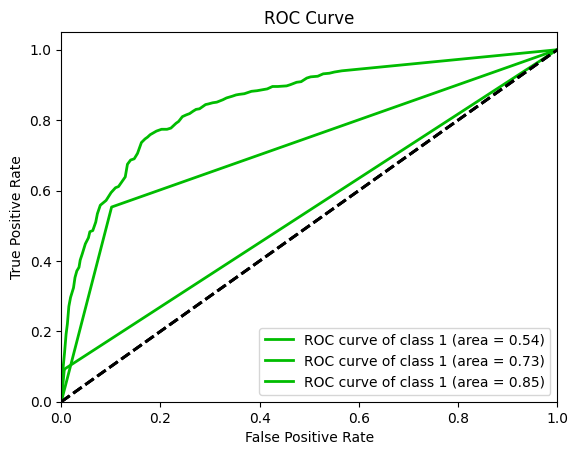

In [7]:
# we can analize the ROC curve
# results seem to be similar to what we got with cumulative gains
ax = skplt.metrics.plot_roc(test_y, score_test, title = "ROC Curve", plot_micro  = False, plot_macro  = False, classes_to_plot=[1] )
ax = skplt.metrics.plot_roc(test_y, score_test_2, title = "ROC Curve", plot_micro  = False, plot_macro  = False, classes_to_plot=[1] , ax = ax)
skplt.metrics.plot_roc(test_y, score_test_3, title = "ROC Curve", plot_micro  = False, plot_macro  = False, classes_to_plot=[1] , ax = ax)

<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

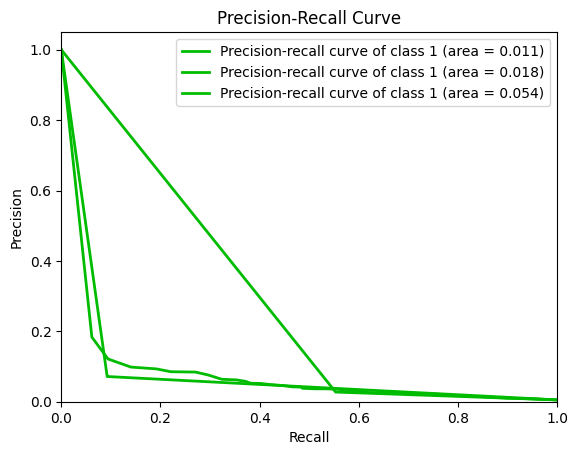

In [8]:
ax = skplt.metrics.plot_precision_recall(test_y, score_test, plot_micro = False,  classes_to_plot=[1])
ax = skplt.metrics.plot_precision_recall(test_y, score_test_2, plot_micro = False,  classes_to_plot=[1], ax=ax)
skplt.metrics.plot_precision_recall(test_y, score_test_3, plot_micro = False,  classes_to_plot=[1], ax=ax)

<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

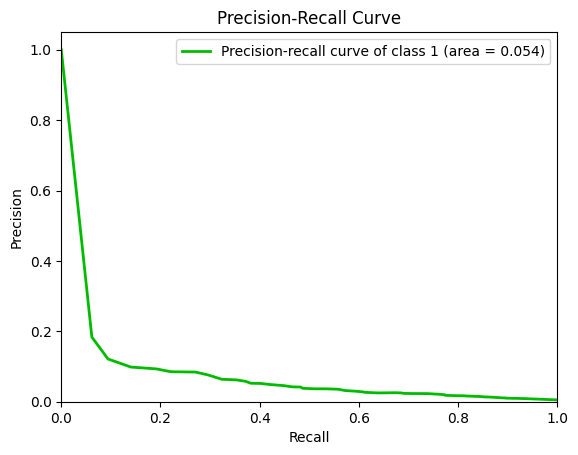

In [9]:
skplt.metrics.plot_precision_recall(test_y, score_test_3, plot_micro = False,  classes_to_plot=[1])

In [ ]:
# another package: it seems not to support multiple models on same chart
# !pip install kds
# import kds
# ax = kds.metrics.plot_cumulative_gain(test_y.ravel(), score_test[:,1])
# kds.metrics.plot_cumulative_gain(test_y.ravel(), score_test_2[:,1], ax = ax)

In [10]:
scores_to_analyze = score_test[:,1]

# it is useful to remember that those plots are built on top of tables
# inspecting such tables can be enlightening
from sklearn.metrics import average_precision_score, precision_recall_curve
prec, rec, thresholds = precision_recall_curve(
    test_y.ravel(), scores_to_analyze.ravel()
)
# we print the prec recall values
# prec recall curve starts with prec = churn proportion and rec =  1
print(prec)
print(rec)
print(thresholds)

# having a look at score frequencies helps in understanding
# what the model is doing
from collections import Counter
print(sorted(Counter(scores_to_analyze).items()))

# it could also be useful to have a look at the scores and target variable together
import pandas as pd
# preparing our analysis table
score_analysis = pd.DataFrame()
score_analysis['target'] = test_y[:,0]
score_analysis['score']= scores_to_analyze


[0.00515851 0.07161804 0.07209613 0.07219251 1.        ]
[1.         0.09246575 0.09246575 0.09246575 0.        ]
[0.  0.2 0.5 1. ]
[(np.float64(0.0), 112457), (np.float64(0.2), 5), (np.float64(0.5), 1), (np.float64(1.0), 748)]


In [ ]:
score_analysis

In [ ]:
# same analysis on ROC curve
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_y.ravel(), score_test_2[:,1].ravel())
# we print fpr and tpr
# prec recall curve starts with prec = churn proportion and rec =  1
print(fpr)
print(tpr)
print(thresholds)
# having a look at score frequencies helps in understanding
# what the model is doing
from collections import Counter
sorted(Counter(score_test[:,1]).items())

[0.         0.10146768 1.        ]
[0.         0.55308219 1.        ]
[inf  1.  0.]


[(0.0, 112457), (0.2, 5), (0.5, 1), (1.0, 748)]

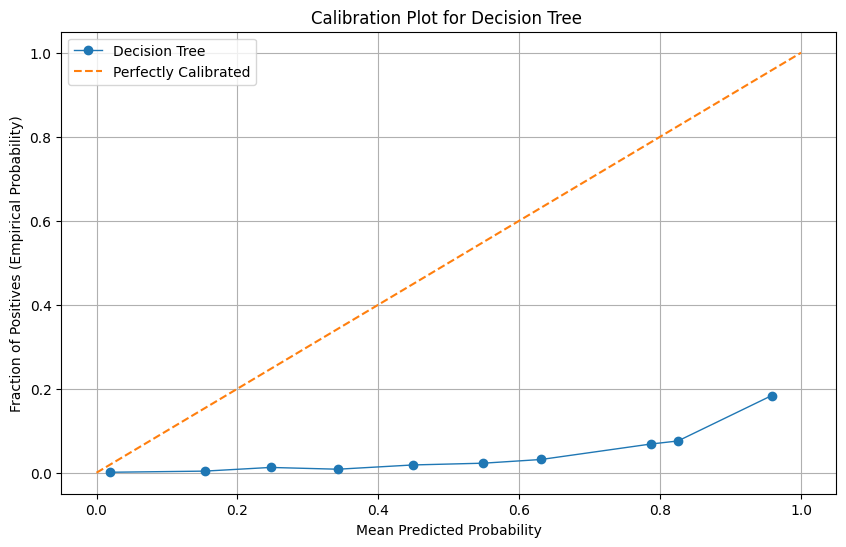

In [12]:
# Let's try to plot the calibration curve
# here the scikit-plot package seems not to work, so i
# build the curve from scratch

import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
scores_to_evaluate = score_test_3[:,1]
prob_true, prob_pred = calibration_curve(test_y, scores_to_evaluate, n_bins=10)
plt.figure(figsize=(10, 6)) # figsize = size of the figure in inches
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Decision Tree')

# Plot the perfectly calibrated line
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')

# Add grid, legend, and labels
plt.grid(True)
plt.legend(loc='best') # add legend (find the best place)
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives (Empirical Probability)')
plt.title(f'Calibration Plot for Decision Tree ')

# Show the plot
plt.show()



